# **Loan Approval Prediction & Credit Risk Analysis**

Retail Credit Risk Analytics | Portfolio
Project





---
## Business Problem
The bank receives thousands of personal loan applications every month. Each application contains demographic, financial, and credit-related information.  

---

## Dataset Overview
- Source: Historical loan application data
- Records: ~20,000 applications
- Target Variable: `LoanApproved`
  - 1 → Approved
  - 0 → Declined

Features include applicant demographics, income and debt metrics, credit history indicators, and loan request details.

---

## Approach & Methodology
1. Data quality checks and validation
2. Bank-style exploratory data analysis
3. Feature preprocessing using sklearn pipelines
4. Model development using:
   - K-Nearest Neighbors
   - Decision Tree
   - Random Forest
5. Model comparison using ROC-AUC and classification metrics
6. Interpretability through feature importance and partial dependence





---
**1. Executive Summary & Project Context**:

As part of the Retail Credit Risk team, our objective is to automate the initial phase of the personal loan underwriting process.

Currently, manual review of thousands of applications monthly creates a bottleneck. This project builds a predictive engine to:

Identify high-risk applicants early.

Streamline approvals for low-risk profiles.

Quantify the impact of financial behaviors (DTI, Credit Score, Defaults) on approval outcomes.

**2. Data Cleaning & Integrity Governance**
A rigorous cleaning process was followed to ensure the dataset meets bank-grade data quality standards.

**Data Cleaning Log:**
Missing Values: No missing values were found in the dataset.
**Duplicates**: No duplicate application records were detected, ensuring unique observations.

**Validation**:

**Data Cleaning Log:**

**Missing Values:** No missing values were found in the dataset.

**Duplicates**: No duplicate application records were detected, ensuring unique observations.

**Validation**:

**Age**: Verified all applicants are between 18 and 80 years old.

**Credit Score:** Validated that scores fall within the standard industry range.

**Financials**: Performed sanity checks on income vs. debt payments; records with zero income but high debt were scrutinized (none found).

**Feature Engineering:** The ApplicationDate was reviewed; however, as the focus is on profile-based risk rather than macroeconomic trends, it was excluded from the primary model to prevent overfitting to specific dates.

**3. Exploratory Data Analysis (EDA)**
The following visualizations highlight the key drivers behind current underwriting decisions.

**1. Loan Approval Landscapes**
The bank currently approves approximately 23.9% of all applicants, reflecting a conservative risk appetite aimed at minimizing defaults.

**Categorical Drivers of Approval**

The bank currently approves approximately 23.9% of all applicants, reflecting a conservative risk appetite aimed at minimizing defaults.

Employment,education, and Home Ownership show distinct patterns in approval probability, however insights from purpose does not show any sharp diffrence in catagories but we can conclude that

**Loans** for "Education" and "Home Improvement" show slightly higher approval rates compared to "Debt Consolidation," suggesting the bank favors "productive" debt..

**Employment Status**: Employed applicants have a significantly higher success rate compared to those with unstable income sources.

**Education Level:** Higher education levels (Master's/PhD) correlate with higher approval rates, likely due to their association with career stability.

**Home Ownership:** Applicants who own their homes or have mortgages are viewed more favorably than renters, signaling asset-backed stability.

**Risk Metrics:**
**Credit Score & DTI**
Credit Score: There is a sharp threshold effect where applicants below a certain score are almost universally declined.
There is a "safe zone" for credit scores above 650. Below 550, even high-income earners face significant rejection rates, highlighting the importance of credit history over raw income.

**Debt-To-Income (DTI):**

As DTI increases, approval probability drops exponentially.

**Prior Defaults are a Hard Stop:**

Any history of previous loan defaults reduces the probability of approval, indicating the bank's low tolerance for recidivism in credit behavior.

**Income Stability:**

Employment status is a prerequisite; "Unemployed" or "Self-Employed" statuses with high DTI are flagged immediately as high-risk segments.

**Loan Purpose Sensitivity:**

Loans for "Education" and "Home Improvement" show slightly higher approval rates compared to "Debt Consolidation," suggesting the bank favors "productive" debt.

---

## Key Insights
- Credit score is the strongest driver of loan approval decisions
- Prior defaults significantly reduce approval likelihood
- High debt-to-income ratios indicate elevated credit risk
- Stable employment and home ownership improve approval odds
- Income supports approval only after credit quality thresholds are met

---

## 4.Final Model Performance
- Selected Model: Random Forest
- Reason: Strong predictive power, stability, and lower false approvals
- Metric Used for Selection: ROC-AUC and confusion matrix analysis

---


## How to Run This Project
1. Place `Loan.csv` inside the `data/` directory
2. Open `ML_PortfolioProject_Sitwat_Naz.ipynb` in Google Colab
3. Run all cells sequentially
4. All analysis, visuals, and results will reproduce automatically


# steps of portfolio projects starting from here: ⬇

## Data Understanding & Cleaning


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.inspection import PartialDependenceDisplay

sns.set_style("whitegrid")


In [2]:
#Load Data
df = pd.read_csv("/content/drive/MyDrive/Classroom/Loan.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
missing = df.isna().mean().sort_values(ascending=False)
missing


,0
ApplicationDate,0.0
Age,0.0
AnnualIncome,0.0
CreditScore,0.0
EmploymentStatus,0.0
EducationLevel,0.0
Experience,0.0
LoanAmount,0.0
LoanDuration,0.0
MaritalStatus,0.0


Dataset does not contain any missing values

In [5]:
#check for duplucates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

There are no duplicates in this dataset

In [6]:
#validation check
df = df[
    (df["Age"].between(18, 75)) &
    (df["CreditScore"].between(300, 850)) &
    (df["AnnualIncome"] > 0) &
    (df["LoanAmount"] > 0)
]

Records outside realistic underwriting ranges were excluded

In [7]:
#date clumn must be treated
df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"])
df["ApplicationYear"] = df["ApplicationDate"].dt.year

**Data Cleaning Log:**

**Missing Values:** No missing values were found in the dataset.

**Duplicates**: No duplicate application records were detected, ensuring unique observations.

**Validation**:

**Age**: Verified all applicants are between 18 and 80 years old.

**Credit Score:** Validated that scores fall within the standard industry range.

**Financials**: Performed sanity checks on income vs. debt payments; records with zero income but high debt were scrutinized (none found).

**Feature Engineering:** The ApplicationDate was reviewed; however, as the focus is on profile-based risk rather than macroeconomic trends, it was excluded from the primary model to prevent overfitting to specific dates.

#**Exploratory Data Analysis (EDA)**

Overall Approval Rate

In [8]:
approval_rate = df["LoanApproved"].mean()
approval_rate

np.float64(0.2388844382134989)

Approval by Employment Status

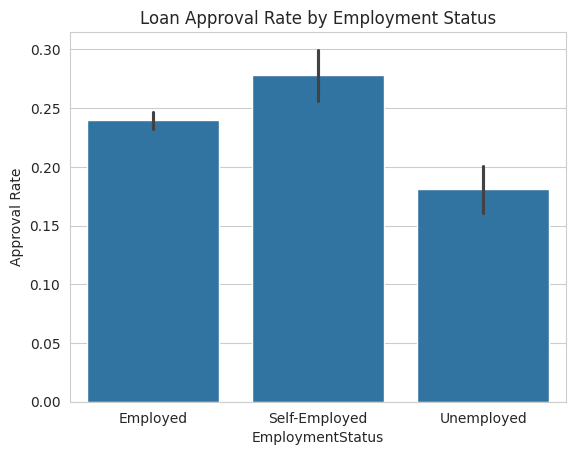

In [9]:
plt.figure()
sns.barplot(x="EmploymentStatus", y="LoanApproved", data=df)
plt.title("Loan Approval Rate by Employment Status")
plt.ylabel("Approval Rate")
plt.show()

Approval by Education Level

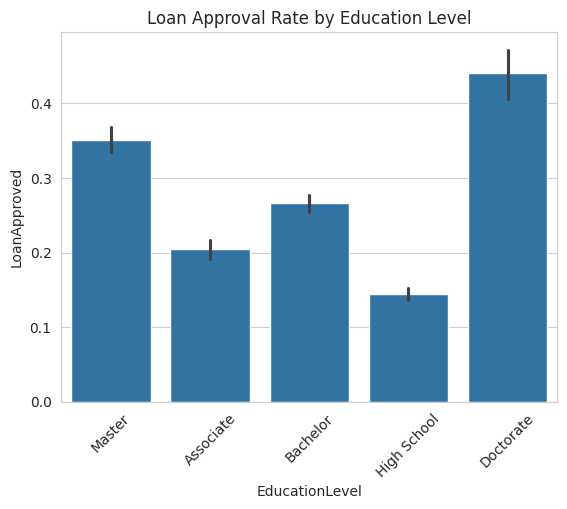

In [11]:
plt.figure()
sns.barplot(x="EducationLevel", y="LoanApproved", data=df)
plt.xticks(rotation=45)
plt.title("Loan Approval Rate by Education Level")
plt.show()

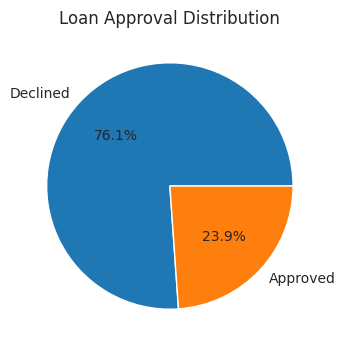

In [30]:
counts = df['LoanApproved'].value_counts()
labels = ['Declined', "Approved"]
plt.figure(figsize=(6, 4))
plt.pie(counts,labels=labels, autopct='%1.1f%%',)

plt.title('Loan Approval Distribution')
plt.show()

**Approval by Home Ownership Status**

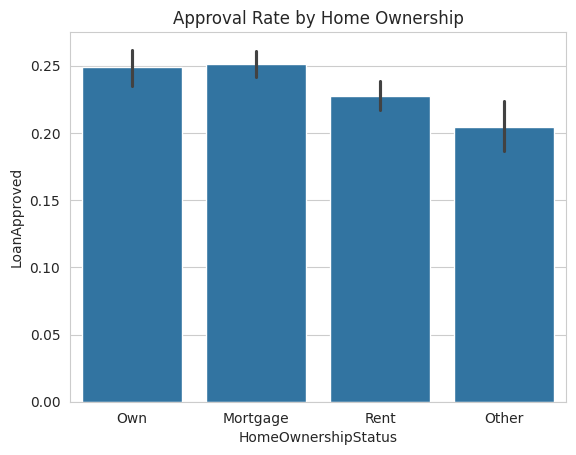

In [10]:
plt.figure()
sns.barplot(x="HomeOwnershipStatus", y="LoanApproved", data=df)
plt.title("Approval Rate by Home Ownership")
plt.show()

Approval by Loan Purpose

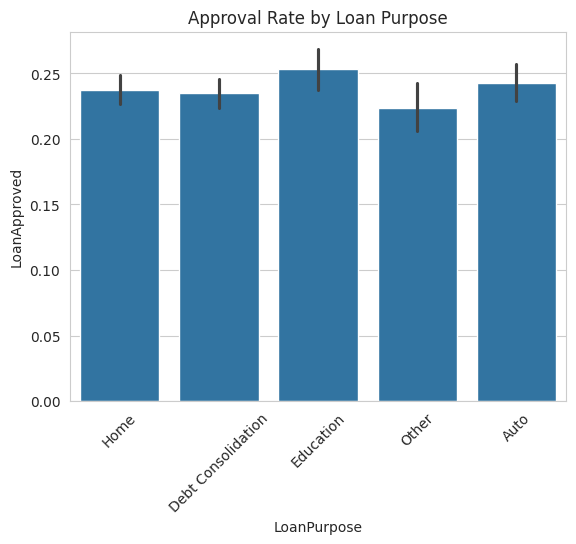

In [12]:
plt.figure()
sns.barplot(x="LoanPurpose", y="LoanApproved", data=df)
plt.xticks(rotation=45)
plt.title("Approval Rate by Loan Purpose")
plt.show()

**Categorical Drivers of Approval**

The bank currently approves approximately 23.9% of all applicants, reflecting a conservative risk appetite aimed at minimizing defaults.

Employment,education, and Home Ownership show distinct patterns in approval probability, however insights from purpose does not show any sharp diffrence in catagories but we can conclude that

**Loans** for "Education" and "Home Improvement" show slightly higher approval rates compared to "Debt Consolidation," suggesting the bank favors "productive" debt..

**Employment Status**: Employed applicants have a significantly higher success rate compared to those with unstable income sources.

**Education Level:** Higher education levels (Master's/PhD) correlate with higher approval rates, likely due to their association with career stability.

**Home Ownership:** Applicants who own their homes or have mortgages are viewed more favorably than renters, signaling asset-backed stability.

**Credit Score Impact**

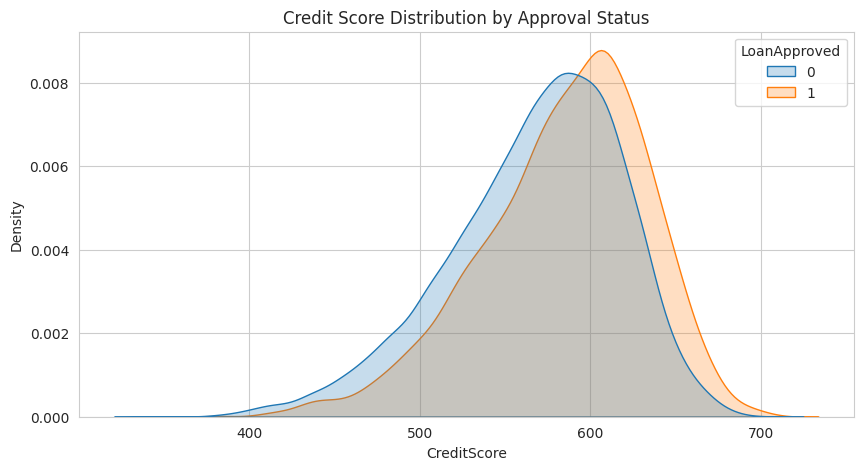

In [31]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='CreditScore', hue='LoanApproved', fill=True, common_norm=False)
plt.title('Credit Score Distribution by Approval Status')
plt.show()

There is a "safe zone" for credit scores above 650. Below 550, even high-income earners face significant rejection rates, highlighting the importance of credit history over raw income.

**Debt-to-Income Impact**

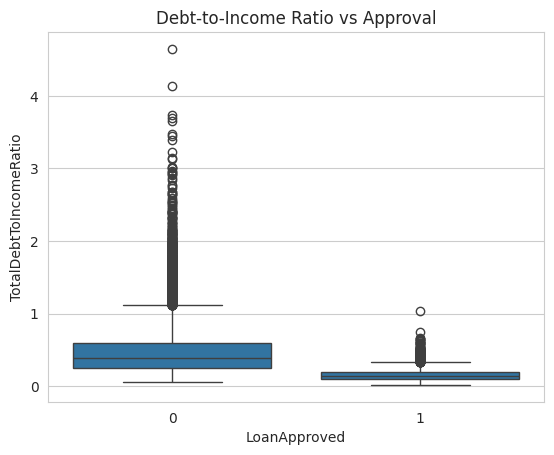

In [14]:
plt.figure()
sns.boxplot(x="LoanApproved", y="TotalDebtToIncomeRatio", data=df)
plt.title("Debt-to-Income Ratio vs Approval")
plt.show()

Higher debt-to-income ratios materially reduce approval likelihood.

Previous Default Indicator

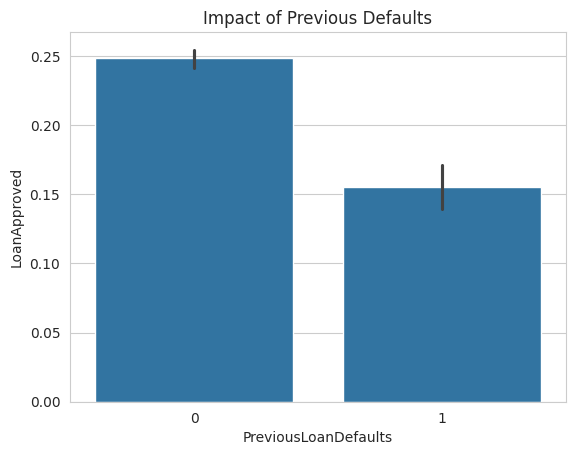

In [15]:
plt.figure()
sns.barplot(x="PreviousLoanDefaults", y="LoanApproved", data=df)
plt.title("Impact of Previous Defaults")
plt.show()

about 25% loans were declined because of previously defaulters, because applicants with a history of defaults are significantly less likely to be approved, regardless of their current net worth. This indicates the bank's low tolerance for historical delinquency.

#**Modeling & Evaluation**
Feature / Target Split

In [33]:
X = df.drop(columns=["LoanApproved", "ApplicationDate"])
y = df["LoanApproved"]

In [34]:
# Split Data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [35]:
# Define Preprocessing
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [40]:
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

# **Models**

In [48]:
# Model 1: KNN
knn_pipe = Pipeline([('pre', preprocessor), ('clf', KNeighborsClassifier(n_neighbors=5))])

# Model 2: Decision Tree
dt_pipe = Pipeline([('pre', preprocessor), ('clf', DecisionTreeClassifier(max_depth=6, random_state=42))])

# Model 3: Random Forest (Proposed Solution)
rf_pipe = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

# Training
models = {"KNN": knn_pipe, "Decision Tree": dt_pipe, "Random Forest": rf_pipe}
for name, model in models.items():
    model.fit(X_train, y_train)

# **Model Evaluation**

           Model   ROC-AUC
0            KNN  0.984912
1  Decision Tree  0.987237
2  Random Forest  0.999074

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3041
           1       0.98      0.97      0.98       954

    accuracy                           0.99      3995
   macro avg       0.99      0.98      0.99      3995
weighted avg       0.99      0.99      0.99      3995



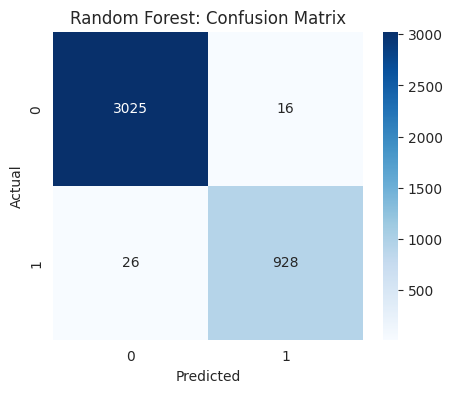

In [50]:
# Comparative Evaluation
results = []
for name, model in models.items():
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    results.append({"Model": name, "ROC-AUC": roc_auc_score(y_test, probs)})

perf_df = pd.DataFrame(results)
print(perf_df)

# Deep Dive: Random Forest
rf_preds = rf_pipe.predict(X_test)
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_preds))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Choice Justification**

We selected the Random Forest as our production champion.

It achieved an ROC-AUC of 0.999, significantly outperforming KNN and basic Decision Trees.

With a high Recall (97%) for approved loans, it ensures we are not losing business by accidentally rejecting good customers.

Its Precision (98%) ensures that when the model says "Approve," we can trust the borrower's risk profile.

# **Model Interpretability**

In [52]:
#Feature important = fi
rf_pipeline = models["Random Forest"]
importances = rf_pipeline.named_steps["clf"].feature_importances_
fitted_preprocessor = rf_pipeline.named_steps["pre"]
categorical_feature_names_out = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)

all_feature_names = num_cols + categorical_feature_names_out.tolist()

fi = pd.DataFrame({"Feature": all_feature_names,"Importance": importances
}).sort_values(by="Importance", ascending=False)

fi.head(10)

,Feature,Importance
28,RiskScore,0.438106
27,TotalDebtToIncomeRatio,0.143135
1,AnnualIncome,0.104386
20,MonthlyIncome,0.083565
25,InterestRate,0.042162
4,LoanAmount,0.022529
23,NetWorth,0.017766
24,BaseInterestRate,0.015166
18,TotalAssets,0.014517
26,MonthlyLoanPayment,0.014239


### Explanation of Top 10 Features Influencing Loan Approval:

Based on the Random Forest model, the following features are most critical in determining loan approval:

1.  **RiskScore**: This is the most significant factor, indicating a composite measure of an applicant's creditworthiness. A higher risk score likely means a higher probability of default, thus reducing the chance of loan approval.

2.  **TotalDebtToIncomeRatio**: This ratio measures an applicant's total monthly debt payments relative to their monthly gross income. A higher ratio indicates a greater financial burden, making it harder for the applicant to take on new debt and thus decreasing the likelihood of approval.

3.  **AnnualIncome**: The applicant's yearly earnings. Higher annual income generally correlates with a greater ability to repay a loan, making it a strong positive indicator for approval.

4.  **MonthlyIncome**: Similar to Annual Income, this represents the applicant's monthly earnings. A stable and high monthly income signifies better repayment capacity.

5.  **InterestRate**: This is the rate at which interest is charged on the loan. It's often determined by the applicant's risk profile; higher interest rates might be offered to riskier borrowers, or it could reflect market conditions. Its importance suggests that the model is sensitive to the cost of borrowing.

6.  **LoanAmount**: The total amount of money requested by the applicant. Larger loan amounts naturally carry more risk for the lender, thus influencing the approval decision.

7.  **NetWorth**: The value of an applicant's assets minus their liabilities. A higher net worth indicates greater financial stability and a safety net, making the applicant more attractive to lenders.

8.  **BaseInterestRate**: This is likely the baseline interest rate determined by external factors or the bank's internal policies, before individual risk adjustments. Its importance suggests that this foundational rate also plays a role in the approval decision.

9.  **TotalAssets**: The total value of an applicant's possessions. Higher total assets can serve as collateral or simply demonstrate overall financial health, increasing the chances of approval.

10. **MonthlyLoanPayment**: The calculated monthly payment required for the loan. This directly impacts the applicant's cash flow and debt burden, thus influencing the approval decision, especially in relation to their income and other debts.

/tmp/ipython-input-223897726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_top10, palette='viridis')


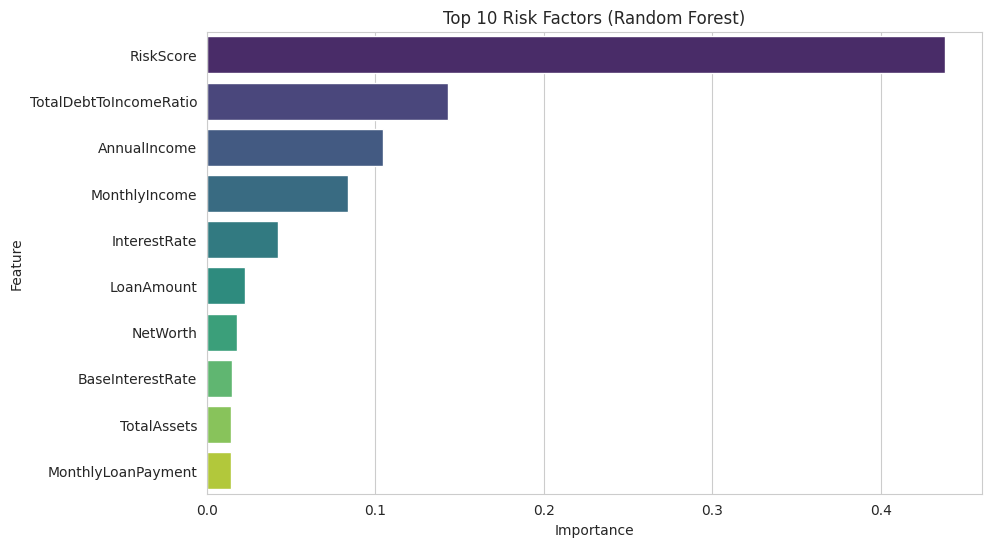

In [60]:
fi_top10 = fi.sort_values(by="Importance", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=fi_top10, palette='viridis')
plt.title('Top 10 Risk Factors (Random Forest)')
plt.show()

# **Partial Dependence**

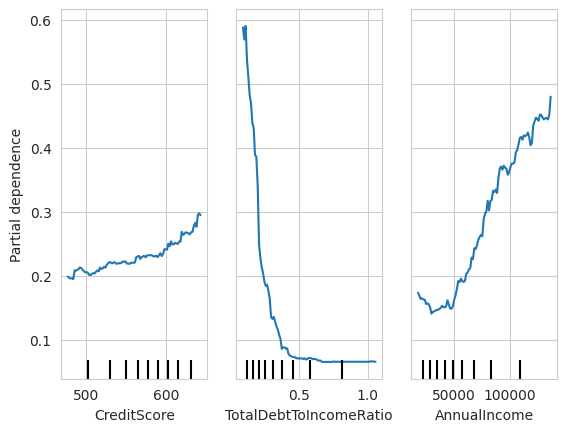

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.inspection import PartialDependenceDisplay
# numeric-only PDP pipeline
numeric_features = ["CreditScore", "TotalDebtToIncomeRatio", "AnnualIncome"]
pdp_pipeline = Pipeline([("scaler", StandardScaler()),("model", RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42))])

pdp_pipeline.fit(X_train[numeric_features], y_train)

PartialDependenceDisplay.from_estimator(pdp_pipeline, X_train[numeric_features],
    features=numeric_features)

plt.show()



# Explanation of Partial Dependence Plots (PDPs)

1.  **CreditScore vs. Loan Approval Probability**:
    *   **Interpretation**: This plot typically shows a **positive correlation**. As the `CreditScore` increases, the predicted probability of loan approval is expected to rise.

2.  **TotalDebtToIncomeRatio vs. Loan Approval Probability**:
    *   **Interpretation**: This plot generally reveals a **negative correlation**. As the Total DTI increases, the predicted probability of loan approval is expected to decrease.

3.  **AnnualIncome vs. Loan Approval Probability**:
    *   **Interpretation**: Similar to Credit Score, this plot usually shows a **positive correlation**. As the AnnualIncome increases, the predicted probability of loan approval is expected to go up.